In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

In questa lezione, vedremo come usare un metodo di clustering per suddividere un insieme di dati senza conoscenza pregressa alcuna (se non, ovviamente, quella riguardante i dati stessi).

## Generazione dei dati

Anche questa volta, useremo una delle funzioni offerte da Scikit Learn per la generazione di dati, ovvero `make_blobs`. Generiamo 1500 campioni, appartenenti a 5 cluster differenti.

In [2]:
X, y = make_blobs(n_samples=1500, centers=5, random_state=42)

Proviamo adesso a predire i cluster usando l'algoritmo KMeans. Usiamo, in tal senso, il valore 2 per il parametro `n_clusters`.

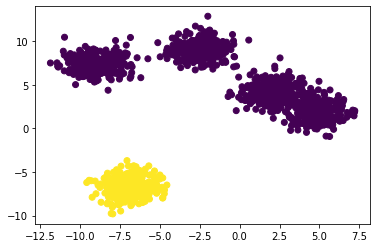

In [3]:
def silhouette_analysis(n_clusters, X):
    clusterer = KMeans(n_clusters=n_clusters)
    fig, ax = plt.subplots()
    ax.set_xlim([-1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax.set_ylabel('Sample')
    ax.set_title('Silhouette analysis')
    cluster_labels = clusterer.fit_predict(X)
    ax.set_xlabel('Silhouette score: {}'.format(
        round(silhouette_score(X, cluster_labels), 2)))
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10

def predict_and_show(clustering_alg, X):
    fig, ax = plt.subplots()
    y_pred = clustering_alg.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.show()
    
predict_and_show(KMeans(n_clusters=2), X)

Appare evidente come la predizione non sia delle migliori: come sappiamo, infatti, il numero di cluster che abbiamo imposto non è corretto. Proviamo ora ad usare il valore corretto, ovvero $5$.

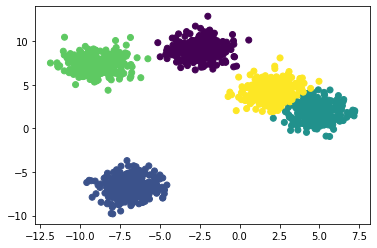

In [4]:
predict_and_show(KMeans(n_clusters=5), X)

I risultati sono molto più soddisfacenti. Per avere un'ulteriore controprova, usiamo la tecnica della *silhouette analysis*. Per farlo, usiamo la funzione `silhouette_analysis`, riadattata dall'esempio raggiungibile a [questo indirizzo](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

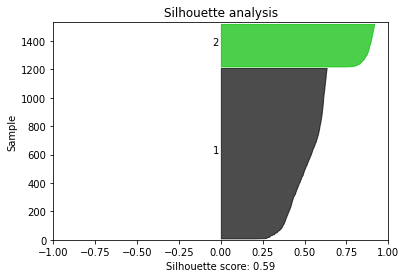

In [5]:
silhouette_analysis(2, X)

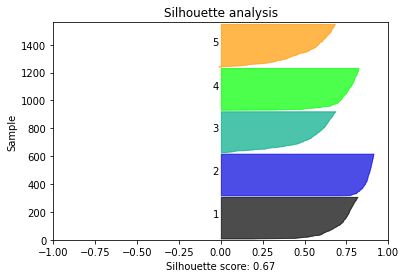

In [6]:
silhouette_analysis(5, X)

L'analisi mostra come il silhouette score sia, come prevedibile, migliore specificando il numero di cluster esatto. Tuttavia, la differenza *non è molto rilevante*: si potrebbe quindi essere tentati di usare un numero basso di cluster, ottenendo risultati evidentemente subottimali.

Nelle prossime lezioni, vedremo come affrontare questo problema al meglio, introducendo algoritmi e metriche più robusti.